### Support vector regression (SVR) is a statistical method that examines the linear relationship between two continuous variables.

- In regression problems, we generally try to find a line that best fits the data provided. The equation of the line in its simplest form is described as below y=mx +c

- In the case of regression using a support vector machine, we do something similar but with a slight change. Here we define a small error value e (error = prediction - actual)

- The value of e determines the width of the error tube (also called insensitive tube). The value of e determines the number of support vectors, and a smaller e value indicates a lower tolerance for error.

- Thus, we try to find the line’s best fit in such a way that: 
   **(mx+c)-y ≤ e and y-(mx+c) ≤ e**
   
- The support vector regression model depends only on a subset of the training data points, as the cost function of the model ignores any training data close to the model prediction when the error is less than e.

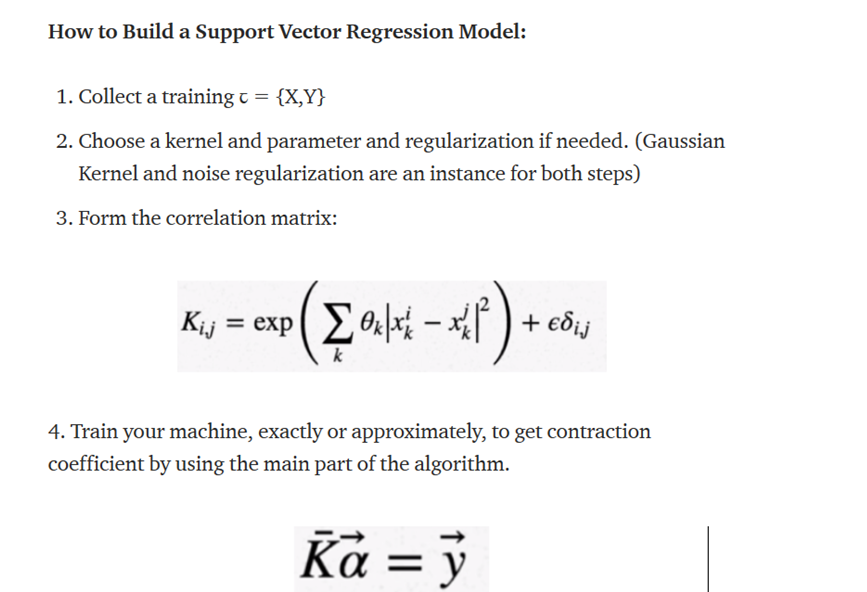

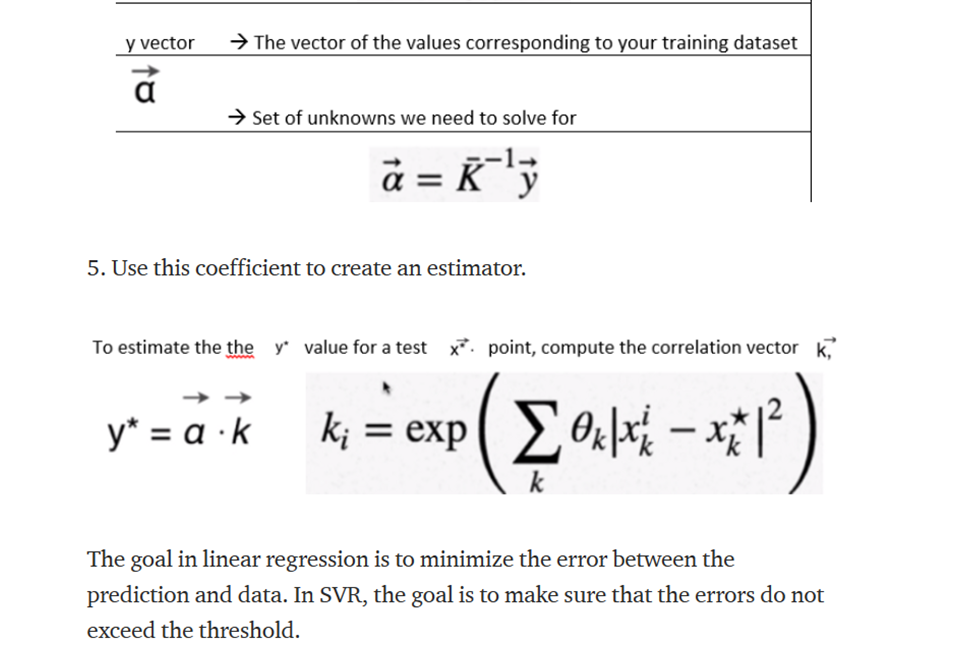

In [2]:
#1 Importing the librariesimport numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
#2 Importing the dataset
dataset = pd.read_excel('Pos.xlsx')
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)

In [4]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [7]:
### 4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR # most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.regressor = SVR(kernel='rbf')
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
#5 Predicting a new result
import numpy as np
X_new=[[7],[4.5]]
y_pred = regressor.predict(X_new)
y_pred

array([0.02762793, 0.0278501 ])

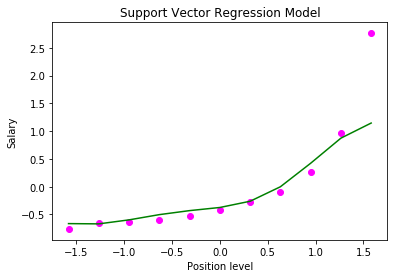

In [20]:
#6 Visualising the Support Vector Regression results
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Support Vector Regression Model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### The current problem causes from the unscaled dataset of our practice. Normally several common class types contain the feature scaling function so that they make feature scaling automatically. However, the SVR class is not a commonly used class type so that we should make feature scaling by our codes.

In [14]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [15]:
## Predicting a new 
y_pred = sc_y.inverse_transform ((regressor.predict (sc_X.transform(np.array([[6.5]])))))

In [19]:
#Visualising the Regression results (for higher resolution and #smoother curve)X_grid = np.arange(min(X), max(X), 0.1)


SyntaxError: invalid character in identifier (<ipython-input-19-055f48d66ff7>, line 3)

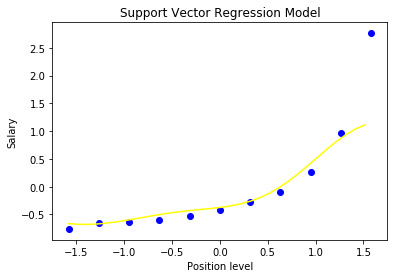

In [25]:
#6 Visualising the Regression results (for higher resolution and #smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, regressor.predict(X_grid), color = 'yellow')
plt.title('Support Vector Regression Model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()